# **In this notebook I intend to explore a dataset looking at different types of Ramen. I intend to do some basic exploratory data analysis and see what I can learn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('ramen-ratings.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Brand    2580 non-null   object
 1   Variety  2580 non-null   object
 2   Style    2578 non-null   object
 3   Country  2580 non-null   object
 4   Stars    2580 non-null   object
 5   Top Ten  41 non-null     object
dtypes: object(6)
memory usage: 121.1+ KB


Concerned that some of the catergories I would expect to be numeric are objects, espcially the stars

In [72]:
df.Stars.unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [75]:
df.Stars.replace('Unrated',np.nan,inplace=True)

In [80]:
df['Stars'] = pd.to_numeric(df.Stars)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    2580 non-null   object 
 1   Variety  2580 non-null   object 
 2   Style    2578 non-null   object 
 3   Country  2580 non-null   object 
 4   Stars    2577 non-null   float64
 5   Top Ten  41 non-null     object 
dtypes: float64(1), object(5)
memory usage: 121.1+ KB


Thats better, now the stars are listed as numeric, lets recheck the dataframe

In [4]:
df.head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


**Initial thoughts**

The review number column appears to just be an index so I will drop that. It seems like we could have a lot of infomation in the Variety column so it would be good to do some feature extraction on that. First, however, I want to do some basic exploratory data analysis to better understand the raw data

In [5]:
df.drop('Review #',axis=1,inplace=True)

In [7]:
print('The number of unique Brands is '+ str(len(df.Brand.unique())))
print('The number of unique countrys is '+ str(len(df.Country.unique())))

The number of unique Brands is 355
The number of unique countrys is 38


In [34]:
df_sorted = df.groupby('Country').count().sort_values('Brand',ascending=False).Brand

In [40]:
df_sorted = df_sorted.reset_index().copy()

<BarContainer object of 38 artists>

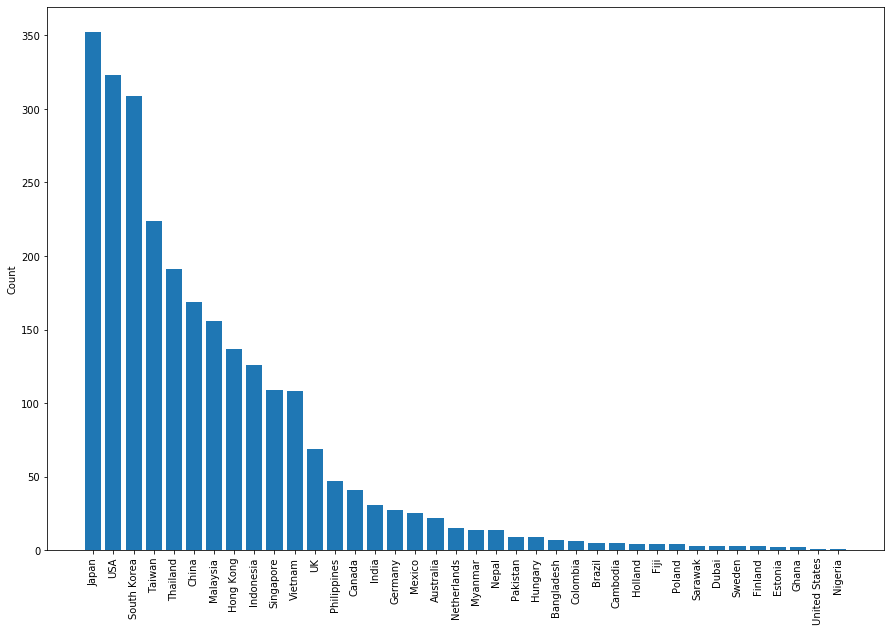

In [161]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.bar(df_sorted.Country,df_sorted.Brand)

Now I want to see the average ramen rating per country, and also add infomation on how many ramens are produced per country

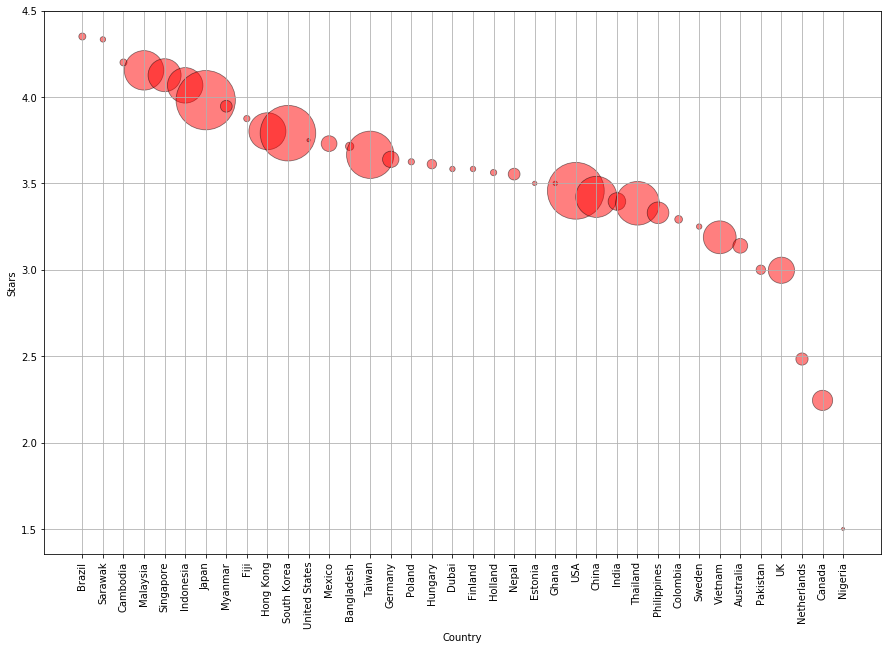

In [165]:
df_ave_stars= df[['Country','Stars']].groupby('Country').mean().sort_values('Stars',ascending=False).reset_index()
df_joined = df_ave_stars.set_index('Country').join(df_sorted.set_index('Country')).reset_index()
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
#plt.hist(df_ave_stars.Stars,bins = 15)
plt.ylabel('Average Ramen Rating')
plt.grid()
sizes = dict(zip(df_joined.Country,df_joined.Brand.values*10))
sns.scatterplot('Country','Stars', data=df_joined,
                size='Country',
                sizes=sizes,
                legend=False,
                alpha=0.5,
                edgecolor='black',
                color='red'
                )
